In [1]:
!pip install matplotlib

In [2]:
!pip install wordcloud

In [3]:
!pip install xlrd

In [4]:
!pip install konlpy

In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
from konlpy.tag import Okt

In [7]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData.xls']

In [8]:
all_files_data = [] #저장할 리스트 
for file in all_files:  
    data_frame = pd.read_excel(file)    
    all_files_data.append(data_frame) 
all_files_data[0] #작업 내용 확인

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,Cloud-Barista 오픈소스 기반 성능 인지 멀티 클라우드 인프라 프로비저닝 ...,"손석호,서지훈,김병섭,강동재",한국정보과학회,정보과학회논문지(Journal of KIISE),Vol.49No.10[2022]\r\n,2022,Korean,"클라우드 컴퓨팅,멀티 클라우드,IaaS,오픈소스,Cloud-Barista,CB-Tu...",NaN,KCI우수등재,...,http://www.kiise.or.kr,816-823,NaN,NaN,NaN,DBpia,NaN,클라우드 인프라는 전 세계적으로 확대되고 있으며 서비스의 형태도 다양화되고 있다. ...,Cloud infrastructures have been expanding all ...,NaN
1,효율적인 클라우드 컴퓨팅을 위한 스마트 계약 기반 최적화된 노드 선택 기법 = A ...,"진호천 ( Haotian Chen ),김태우 ( Tae Woo Kim ),박진호 (...",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.29No.1[2022]\r\n,2022,NaN,NaN,500.0,NaN,...,NaN,48-51,NaN,NaN,NaN,KISS,NaN,정보통신기술의 (ICT) 발전에 따라 기업은 사용자에게 다양한 서비스를 제공하기 위...,NaN,NaN
2,UNCITRAL 가이드와 클라우드 표준계약서 비교검토 = Comparative Re...,성승제,한국상사법학회,商事法硏究(KOREAN COMMERCIAL LAW ASSOCIATION),Vol.41No.2[2022]\r\n,2022,Korean,"운시트랄 가이드,표준계약서,이용자보호,클라우드 계약,공공부문 클라우드,Uncitra...",NaN,KCI등재,...,http://www.korcla.net,617-662,0.0,NaN,NaN,KCI,이화여자대학교 중앙도서관,인터넷은 애당초 비상 상황에서도 작동하는 컴퓨팅 네트워크를 만들려는 목적에서 출발하...,The Internet was originally conceived with the...,NaN
3,안정적인 멀티 프라이빗 클라우드 환경을 지원하기 위한 공통 운영 리소스 관리 기법 ...,"정수민,박준석,염근혁",한국차세대컴퓨팅학회,한국차세대컴퓨팅학회 논문지(The Journal of Korean Institute...,Vol.18No.3[2022]\r\n,2022,Korean,"멀티 프라이빗 클라우드,프라이빗 클라우드 구축,프라이빗 클라우드 관리,클라우드 로그...",NaN,KCI등재,...,NaN,17-27,0.0,NaN,NaN,"eArticle, &nbsp;&nbsp; KCI",NaN,최근 클라우드 플랫폼은 클라우드 플랫폼의 운영 안정성 증대 및 특화 기능 활용을 위...,"Recently, the cloud platform is changed into a...",NaN
4,수사목적 클라우드(cloud) 압수수색의 현재와 미래 = The Present an...,김면기(Myeongi Kim),한국형사법학회,刑事法硏究(Journal of Criminal Law),Vol.35No.1[2023]\r\n,2023,NaN,"클라우드,압수수색,특정성,한국,미국,Cloud,Search and Seizure,P...",360.0,KCI우수등재,...,http://www.kcla.net,205-237,NaN,NaN,NaN,스콜라,NaN,"오늘날 클라우드(cloud) 시스템의 활용도가 높아지면서, 수사과정에서도 클라우드압...","Compared to the U.S., the legal development of...",Ⅰ. 들어가며\r\nⅡ. 우리나라의 클라우드 압수수색 관련 법적 쟁점\r\nⅢ. 미...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,클라우드-네이티브 엣지 클러스터에 대한 악성행위의 AI 기반 관측성 준비,"양주영(Juyoung Yang),김종원(JongWon Kim)",한국통신학회,한국통신학회 학술대회논문집,Vol.2023No.6[2023]\r\n,2023,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,459-460,NaN,NaN,NaN,DBpia,NaN,NaN,NaN,NaN
96,클라우드-RSU-차량 아키텍처에서 에너지 지연 균형을 위한 동적 로드밸런싱 알고리즘,"최평준(Pyeongjun Choi),윤필도(Pildo Yoon),곽정호(Jeongh...",한국통신학회,韓國通信學會論文誌(The Journal of the KICS),Vol.49No.3[2024]\r\n,2024,Korean,"로드밸런싱,Lyapunov 최적화,엣지 컴퓨팅,Load balancing,Lyapu...",567.0,KCI등재,...,http://kics.or.kr,377-384,NaN,NaN,NaN,DBpia,NaN,NaN,Advanced autonomous driving services at Level ...,NaN
97,클라우드-네이티브 엣지 클러스터의 V2X 통신 데이터 수집을 위한 이동형 Smart...,"구동환(DongHwan Ku),박선(Sun Park),김종원(JongWon Kim)",한국통신학회,한국통신학회 학술대회논문집,Vol.2024No.1[2024]\r\n,2024,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,550-551,NaN,NaN,NaN,DBpia,NaN,NaN,NaN,NaN
98,클라우드기반 의료영상 라벨링 시스템 개발및 근감소증 정량 분석 = Developme...,"이충섭,임동욱,김지언,노시형,유영주,김태훈,윤권하,정창원",한국정보처리학회,정보처리학회논문지. 컴퓨터 및 통신시스템(KIPS Transactions on Co...,Vol.11No.7[2022]\r\n,2022,Korean,"Artificial Intelligence,Medical Image,DICOM,CT...",NaN,KCI등재,...,NaN,233-240,0.0,NaN,NaN,"ScienceON, &nbsp;&nbsp; KCI, &nbsp;&nbsp; KISS",남서울대학교 성암기념중앙도서관,최근 대부분의 인공지능 연구는 AI 모델 개발에 중점을 두고 있다. 하지만 최근 인...,Most of the recent AI researches has focused o...,NaN


In [9]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat
 #출력하여 내용 확인

,제목,저자,발행기관,학술지명,권호사항,발행연도,작성언어,주제어,KDC,등재정보,...,발행기관 URL,수록면,KCI 피인용횟수,비고,중단사유,제공처,소장기관,국문 초록 (Abstract),다국어 초록 (Multilingual Abstract),목차
0,Cloud-Barista 오픈소스 기반 성능 인지 멀티 클라우드 인프라 프로비저닝 ...,"손석호,서지훈,김병섭,강동재",한국정보과학회,정보과학회논문지(Journal of KIISE),Vol.49No.10[2022]\r\n,2022,Korean,"클라우드 컴퓨팅,멀티 클라우드,IaaS,오픈소스,Cloud-Barista,CB-Tu...",NaN,KCI우수등재,...,http://www.kiise.or.kr,816-823,NaN,NaN,NaN,DBpia,NaN,클라우드 인프라는 전 세계적으로 확대되고 있으며 서비스의 형태도 다양화되고 있다. ...,Cloud infrastructures have been expanding all ...,NaN
1,효율적인 클라우드 컴퓨팅을 위한 스마트 계약 기반 최적화된 노드 선택 기법 = A ...,"진호천 ( Haotian Chen ),김태우 ( Tae Woo Kim ),박진호 (...",한국정보처리학회,한국정보처리학회 학술대회논문집,Vol.29No.1[2022]\r\n,2022,NaN,NaN,500.0,NaN,...,NaN,48-51,NaN,NaN,NaN,KISS,NaN,정보통신기술의 (ICT) 발전에 따라 기업은 사용자에게 다양한 서비스를 제공하기 위...,NaN,NaN
2,UNCITRAL 가이드와 클라우드 표준계약서 비교검토 = Comparative Re...,성승제,한국상사법학회,商事法硏究(KOREAN COMMERCIAL LAW ASSOCIATION),Vol.41No.2[2022]\r\n,2022,Korean,"운시트랄 가이드,표준계약서,이용자보호,클라우드 계약,공공부문 클라우드,Uncitra...",NaN,KCI등재,...,http://www.korcla.net,617-662,0.0,NaN,NaN,KCI,이화여자대학교 중앙도서관,인터넷은 애당초 비상 상황에서도 작동하는 컴퓨팅 네트워크를 만들려는 목적에서 출발하...,The Internet was originally conceived with the...,NaN
3,안정적인 멀티 프라이빗 클라우드 환경을 지원하기 위한 공통 운영 리소스 관리 기법 ...,"정수민,박준석,염근혁",한국차세대컴퓨팅학회,한국차세대컴퓨팅학회 논문지(The Journal of Korean Institute...,Vol.18No.3[2022]\r\n,2022,Korean,"멀티 프라이빗 클라우드,프라이빗 클라우드 구축,프라이빗 클라우드 관리,클라우드 로그...",NaN,KCI등재,...,NaN,17-27,0.0,NaN,NaN,"eArticle, &nbsp;&nbsp; KCI",NaN,최근 클라우드 플랫폼은 클라우드 플랫폼의 운영 안정성 증대 및 특화 기능 활용을 위...,"Recently, the cloud platform is changed into a...",NaN
4,수사목적 클라우드(cloud) 압수수색의 현재와 미래 = The Present an...,김면기(Myeongi Kim),한국형사법학회,刑事法硏究(Journal of Criminal Law),Vol.35No.1[2023]\r\n,2023,NaN,"클라우드,압수수색,특정성,한국,미국,Cloud,Search and Seizure,P...",360.0,KCI우수등재,...,http://www.kcla.net,205-237,NaN,NaN,NaN,스콜라,NaN,"오늘날 클라우드(cloud) 시스템의 활용도가 높아지면서, 수사과정에서도 클라우드압...","Compared to the U.S., the legal development of...",Ⅰ. 들어가며\r\nⅡ. 우리나라의 클라우드 압수수색 관련 법적 쟁점\r\nⅢ. 미...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,클라우드-네이티브 엣지 클러스터에 대한 악성행위의 AI 기반 관측성 준비,"양주영(Juyoung Yang),김종원(JongWon Kim)",한국통신학회,한국통신학회 학술대회논문집,Vol.2023No.6[2023]\r\n,2023,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,459-460,NaN,NaN,NaN,DBpia,NaN,NaN,NaN,NaN
496,클라우드-RSU-차량 아키텍처에서 에너지 지연 균형을 위한 동적 로드밸런싱 알고리즘,"최평준(Pyeongjun Choi),윤필도(Pildo Yoon),곽정호(Jeongh...",한국통신학회,韓國通信學會論文誌(The Journal of the KICS),Vol.49No.3[2024]\r\n,2024,Korean,"로드밸런싱,Lyapunov 최적화,엣지 컴퓨팅,Load balancing,Lyapu...",567.0,KCI등재,...,http://kics.or.kr,377-384,NaN,NaN,NaN,DBpia,NaN,NaN,Advanced autonomous driving services at Level ...,NaN
497,클라우드-네이티브 엣지 클러스터의 V2X 통신 데이터 수집을 위한 이동형 Smart...,"구동환(DongHwan Ku),박선(Sun Park),김종원(JongWon Kim)",한국통신학회,한국통신학회 학술대회논문집,Vol.2024No.1[2024]\r\n,2024,Korean,NaN,567.0,NaN,...,http://www.kics.or.kr,550-551,NaN,NaN,NaN,DBpia,NaN,NaN,NaN,NaN
498,클라우드기반 의료영상 라벨링 시스템 개발및 근감소증 정량 분석 = Developme...,"이충섭,임동욱,김지언,노시형,유영주,김태훈,윤권하,정창원",한국정보처리학회,정보처리학회논문지. 컴퓨터 및 통신시스템(KIPS Transactions on Co...,Vol.11No.7[2022]\r\n,2022,Korean,"Artificial Intelligence,Medical Image,DICOM,CT...",NaN,KCI등재,...,NaN,233-240,0.0,NaN,NaN,"ScienceON, &nbsp;&nbsp; KCI, &nbsp;&nbsp; KISS",남서울대학교 성암기념중앙도서관,최근 대부분의 인공지능 연구는 AI 모델 개발에 중점을 두고 있다. 하지만 최근 인...,Most of the recent AI researches has focused o...,NaN


In [10]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding = 'utf-8', index = False)

In [11]:
# CSV 파일 읽기
df = pd.read_csv('riss_bigdata.csv')

# Okt 객체 생성
okt = Okt()

# 명사 추출 함수 정의, 입력 값이 문자열이 아닌 경우를 처리
def extract_nouns(sentence):
    # 입력이 float(실수)이고 NaN인 경우 빈 문자열 반환
    if isinstance(sentence, float):
        return []
    return okt.nouns(sentence)

# 한글 문장 데이터가 포함된 열 이름을 'korean_sentence'라고 가정
df['nouns'] = df['국문 초록 (Abstract)'].apply(extract_nouns)

# 결과 출력
print(df['nouns'])

0      [클라우드, 인프라, 전, 세계, 확대, 서비스, 형태, 다양, 사용자, 단일, 클...
1      [정보통, 기술, 발전, 기업, 사용자, 서비스, 제공, 위해, 클라우드, 서비스,...
2      [인터넷, 애, 당초, 비상, 상황, 작동, 컴퓨팅, 네트워크, 목적, 출발, 이후...
3      [최근, 클라우드, 플랫폼, 클라우드, 플랫폼, 운영, 안정, 증대, 및, 특화, ...
4      [오늘날, 클라우드, 시스템, 활, 용도, 과정, 클라우드, 압수수색, 증거, 수집...
                             ...                        
495                                                   []
496                                                   []
497                                                   []
498    [최근, 대부분, 인공, 지능, 연구, 모델, 개발, 중점, 최근, 인공, 지능, ...
499                                                   []
Name: nouns, Length: 500, dtype: object


In [12]:
words2 = list(reduce(lambda x, y: x+y,df['nouns']))
print(words2)  #작업 내용 확인

['클라우드', '인프라', '전', '세계', '확대', '서비스', '형태', '다양', '사용자', '단일', '클라우드', '사용', '발생', '수', '제약', '극복', '두', '개', '이상', '클라우드', '계', '활용', '멀티', '클라우드', '도입', '멀티', '클라우드', '인프라', '배치', '관리', '복잡', '성도', '더욱', '논문', '문제', '경감', '위해', '효율', '멀티', '클라우드', '인프라', '프로비저닝', '방안', '모색', '성능', '평가', '통해', '이종', '클라우드', '자원', '성능', '분석', '최적', '프로비저닝', '수', '구조', '제안', '논문', '를', '통해', '구현', '멀티', '클라우드', '인프라', '적', '프로비저닝', '구조', '소개', '클라우드', '성능', '평가', '위', '메커니즘', '제시', '주요', '클라우드', '성능', '실험', '통해', '분석', '멀티', '클라우드', '인프라', '구성', '적', '프로비저닝', '과정', '실증', '제시', '실험', '및', '실증', '통해', '최적', '멀티', '클라우드', '인프라', '구성', '실효', '수', '정보통', '기술', '발전', '기업', '사용자', '서비스', '제공', '위해', '클라우드', '서비스', '공급', '자의', '클라우드', '활용', '클라우드', '서비스', '공급', '기업', '전문', '효율', '클라우드', '서비스', '제공', '기업', '클라우드', '설치', '제공', '서비스', '활용', '서비스', '제공', '수', '최근', '클라우드', '서비스', '이용', '기업', '세계', '증가', '함', '클라우드', '공급', '효과', '서비스', '제공', '위해', '클라우드', '컴퓨팅', '기술', '적용', '클라우드', '사용', '기업', '증가', '함', '클라우드', '

In [13]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'클라우드': 705,
         '수': 287,
         '데이터': 189,
         '서비스': 184,
         '연구': 182,
         '정보': 167,
         '기반': 162,
         '및': 155,
         '기술': 154,
         '활용': 152,
         '대한': 149,
         '통해': 143,
         '위': 134,
         '환경': 134,
         '제안': 131,
         '것': 130,
         '제공': 123,
         '사용자': 116,
         '논문': 114,
         '분석': 114,
         '시스템': 112,
         '포인트': 112,
         '사용': 104,
         '모델': 99,
         '컴퓨팅': 96,
         '적용': 96,
         '위해': 94,
         '네트워크': 94,
         '이': 89,
         '결과': 88,
         '플랫폼': 86,
         '등': 84,
         '보안': 81,
         '기존': 77,
         '효율': 76,
         '관리': 75,
         '제시': 74,
         '관련': 73,
         '과정': 72,
         '방법': 69,
         '서버': 68,
         '를': 67,
         '점': 66,
         '성능': 64,
         '기법': 63,
         '평가': 62,
         '이용': 61,
         '때문': 59,
         '디지털': 59,
         '의': 58,
         '발생': 56,
     

In [14]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

클라우드 : 705
데이터 : 189
서비스 : 184
연구 : 182
정보 : 167
기반 : 162
기술 : 154
활용 : 152
대한 : 149
통해 : 143
환경 : 134
제안 : 131
제공 : 123
사용자 : 116
논문 : 114
분석 : 114
시스템 : 112
포인트 : 112
사용 : 104
모델 : 99
컴퓨팅 : 96
적용 : 96
위해 : 94
네트워크 : 94
결과 : 88
플랫폼 : 86
보안 : 81
기존 : 77
효율 : 76
관리 : 75
제시 : 74
관련 : 73
과정 : 72
방법 : 69
서버 : 68
성능 : 64
기법 : 63
평가 : 62
이용 : 61
때문 : 59
디지털 : 59
발생 : 56
압수 : 56
구조 : 55
증가 : 55
구축 : 55
따라서 : 54
처리 : 54
밀도 : 54
확인 : 53
저장 : 53
지원 : 52
개발 : 52
차원 : 52
기업 : 51
최근 : 51
또한 : 50
수행 : 49
문제 : 48
효과 : 48
경우 : 48
구성 : 47
영역 : 47
자원 : 45
운영 : 45
방안 : 44
증거 : 44
분산 : 44
실험 : 42


In [15]:
del word_count ['연구']
del word_count ['분석']

In [16]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

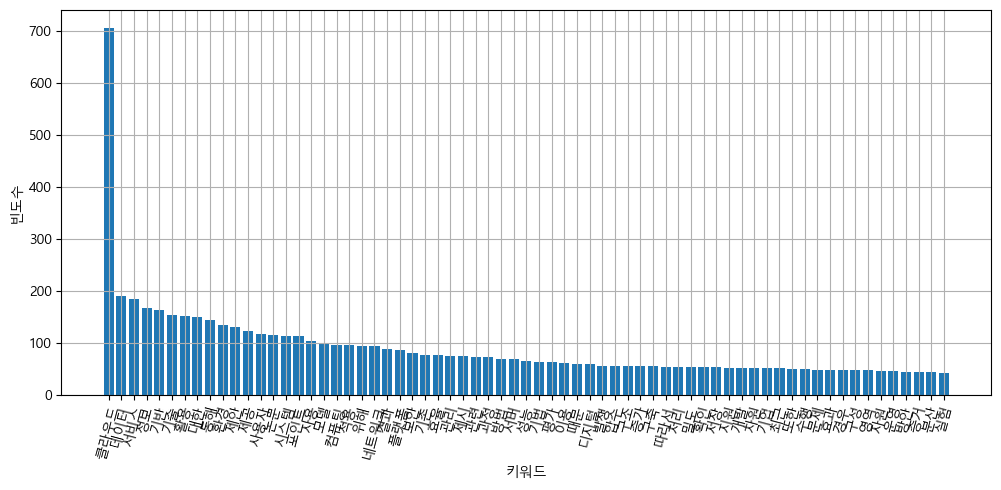

In [17]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=75)

plt.show()

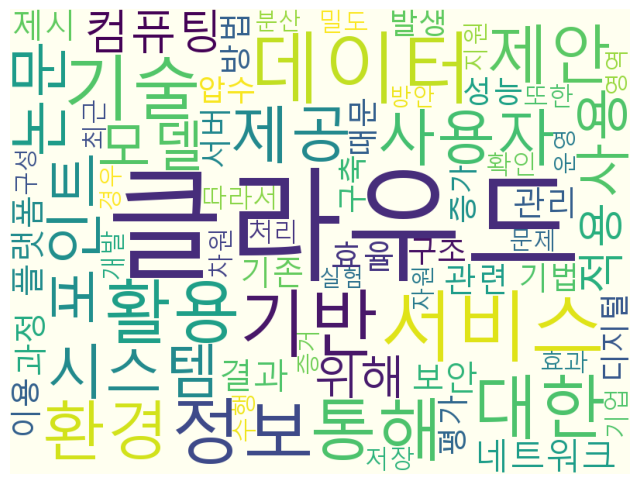

In [18]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()